In [27]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score
from scipy.cluster.hierarchy import linkage, fcluster
import matplotlib.pyplot as plt

In [28]:
customers_file = r"D:\Company assignments\Zeotap_Data_science_assignment\data\Customers.csv"
products_file = r"D:\Company assignments\Zeotap_Data_science_assignment\data\Products.csv"
transactions_file = r"D:\Company assignments\Zeotap_Data_science_assignment\data\Transactions.csv"

In [29]:
customers = pd.read_csv(customers_file)
products = pd.read_csv(products_file)
transactions = pd.read_csv(transactions_file)

In [30]:
customer_spending = transactions.groupby('CustomerID')['TotalValue'].sum().reset_index()
customer_spending = customer_spending.rename(columns={'TotalValue': 'TotalSpend'})

In [31]:
product_purchase = transactions.groupby('CustomerID')['ProductID'].nunique().reset_index()
product_purchase = product_purchase.rename(columns={'ProductID': 'ProductCount'})

In [32]:
# Combine customer demographic, total spend, and product purchase data
customer_data = pd.merge(customers, customer_spending, on='CustomerID', how='left')
customer_data = pd.merge(customer_data, product_purchase, on='CustomerID', how='left')

In [33]:
# Fill missing values with 0
customer_data = customer_data.fillna(0)

In [34]:
# Standardize the data (scaling)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data[['TotalSpend'] + list(product_purchase.columns[1:])])

In [35]:
# Apply Single Linkage clustering
Z_single = linkage(scaled_data, method='single')
cluster_labels_single = fcluster(Z_single, t=4, criterion='maxclust') 

In [36]:
# Calculate Davies-Bouldin Index for Single Linkage
dbi_single = davies_bouldin_score(scaled_data, cluster_labels_single)
print(f"Single Linkage Clustering - Davies-Bouldin Index: {dbi_single:.2f}")

Single Linkage Clustering - Davies-Bouldin Index: 0.38


In [37]:
# Apply PCA to reduce the data to 2D for visualization
pca = PCA(n_components=2)
pca_components_single = pca.fit_transform(scaled_data)

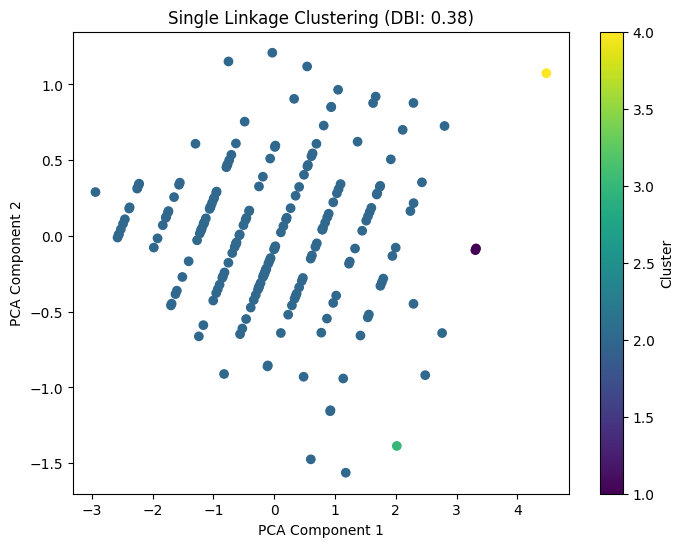

In [38]:
# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_components_single[:, 0], pca_components_single[:, 1], c=cluster_labels_single, cmap='viridis')
plt.title(f'Single Linkage Clustering (DBI: {dbi_single:.2f})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [39]:
# Print final results (clusters and DBI)
print("Clustered Data:")
customer_data['Cluster'] = cluster_labels_single
print(customer_data[['CustomerID', 'Cluster']].head())

Clustered Data:
  CustomerID  Cluster
0      C0001        2
1      C0002        2
2      C0003        2
3      C0004        2
4      C0005        2


In [40]:
# Calculate Davies-Bouldin Index for Single Linkage
dbi_single = davies_bouldin_score(scaled_data, cluster_labels_single)

# Print the Davies-Bouldin Index
print(f"Single Linkage Clustering - Davies-Bouldin Index: {dbi_single:.2f}")


Single Linkage Clustering - Davies-Bouldin Index: 0.38
